Contains results from gyroscope data downsampling

In [1]:
from google.colab import files
uploaded = files.upload()

Saving gyro_x.csv to gyro_x.csv
Saving gyro_z.csv to gyro_z.csv


In [2]:
from google.colab import files
uploaded = files.upload()

Saving gyro_y.csv to gyro_y.csv


In [3]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from datetime import datetime

import matplotlib.colors as mcolors

import time

In [4]:
data_x = pd.read_csv('gyro_x.csv')
data_y = pd.read_csv('gyro_y.csv')
data_z = pd.read_csv('gyro_z.csv')

In [5]:
gyro = pd.DataFrame()
gyro['x'] = data_x
gyro['y'] = data_y
gyro['z'] = data_z

In [6]:
print(gyro)

               x          y          z
0     -67.057939 -81.758550   1.679872
1      19.338394  -6.583667 -28.526721
2      27.360235  -6.144756 -24.467029
3      31.251388  -1.785914 -23.471549
4      29.466326   2.784815 -23.720419
...          ...        ...        ...
30185   0.123414   0.030270  -0.015554
30186   0.169426   0.015135   0.108881
30187  -0.062624  -0.105944   0.108881
30188   0.216203   0.075674   0.093326
30189  -0.061248   0.030270   0.077772

[30190 rows x 3 columns]


In [7]:
# Defining constants

labels = ['x','y','z']
color_map = ['orange', 'c', 'pink']

number_of_signals = 3;
fs = 512
cut_off = 1
length = 10000

RAW DATA

In [21]:
def plot_lines(data, title):

  fig, ax = plt.subplots()

  index = np.arange(length)/fs
  ax.plot(index, data['x'], color_map[0], label = labels[0])
  ax.plot(index, data['y'], color_map[1], label = labels[1])
  ax.plot(index, data['z'], color_map[2], label = labels[2])

  ax.set_xlim([0, length/fs])
  ax.set_ylim([-150, 250])
  ax.set_xlabel('Time [s]')
  ax.set_title(title)
  
  ax.legend()

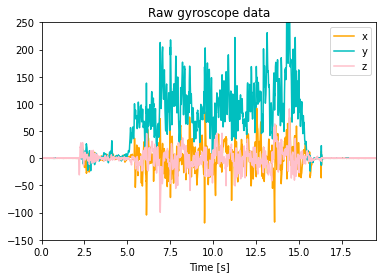

In [22]:
data = gyro[10000 : 20000]

plot_lines(data, 'Raw gyroscope data')

DOWNSAMPLED DATA

In [28]:
length_of_signal = 1886

new_x = np.zeros(length_of_signal)
new_y = np.zeros(length_of_signal)
new_z = np.zeros(length_of_signal)
i = 16; 

import time 

t = time.time()
while i<=30182:
  new_x[(i//16)-1] = np.mean(gyro['x'][i-8:i+8])
  new_y[(i//16)-1] = np.mean(gyro['y'][i-8:i+8])
  new_z[(i//16)-1] = np.mean(gyro['z'][i-8:i+8])
  i = i + 16

elapsed = time.time() - t
print(elapsed)

0.7895321846008301


In [29]:
data = np.zeros([length_of_signal, number_of_signals])
data[:, 0] = new_x
data[:, 1] = new_y
data[:, 2] = new_z

print(data)

[[ 2.79275745 -0.21567185 -1.64195854]
 [ 0.09153164  0.0160808   0.0865212 ]
 [ 0.07821958  0.03121566  0.08749335]
 ...
 [ 0.03962412  0.01891858  0.07485542]
 [ 0.04017505 -0.02175637  0.07096683]
 [ 0.08099027  0.01986451  0.1147135 ]]


Text(0.5, 0, 'Time [s]')

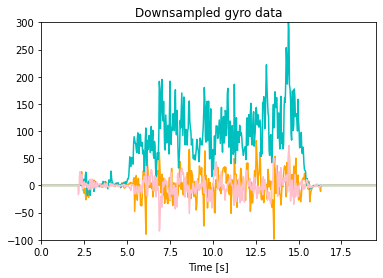

In [30]:
fs = 32
rows_start = 625
rows_end = 1250
cols = 3

fig, ax = plt.subplots()

labels = ['x','y','z']
color_map = ['orange', 'c', 'pink']

index = np.arange(rows_end-rows_start)/fs
ax.plot(index, data[rows_start:rows_end, 0], color_map[0], label = labels[0])
ax.plot(index, data[rows_start:rows_end, 1], color_map[1], label = labels[1])
ax.plot(index, data[rows_start:rows_end, 2], color_map[2], label = labels[2])

ax.set_title("Downsampled gyro data")
ax.set_xlim([0, (rows_end-rows_start)/fs])
ax.set_ylim([-100, 300])
ax.set_xlabel('Time [s]')